In [78]:
# Import our dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import gmaps
import scipy.stats as stats

# Google developer API key
from configJJ import gkey

# Configure gmaps
gmaps.configure(api_key=gkey)

In [79]:
# Take in all of our data and read it into pandas
crimedata_newyork = "Crime_Data/New_York_Crime_Data.csv"

crimedata_newyork_df = pd.read_csv(crimedata_newyork)

In [80]:
crimedata_newyork_df.head()

,Date,Latitude,Longitude,Unnamed: 3
0,12/31/2018,40.756044,-73.986950,NaN
1,12/31/2018,40.675146,-73.918003,NaN
2,12/31/2018,40.633016,-73.944756,NaN
3,12/31/2018,40.721512,-73.993096,NaN
4,12/31/2018,40.852908,-73.909340,NaN


crimedata_newyork_df["City"] = "New York"
crimedata_newyork_df.drop[]

In [81]:
del crimedata_newyork_df["Unnamed: 3"]

In [82]:
crimedata_newyork_df["City"] = "New York"


In [83]:
crimedata_newyork_df.dropna().head()

,Date,Latitude,Longitude,City
0,12/31/2018,40.756044,-73.986950,New York
1,12/31/2018,40.675146,-73.918003,New York
2,12/31/2018,40.633016,-73.944756,New York
3,12/31/2018,40.721512,-73.993096,New York
4,12/31/2018,40.852908,-73.909340,New York


In [84]:
crimedata_newyork_df["Date"] = crimedata_newyork_df["Date"].astype("datetime64")

In [85]:
crimedata_newyork_df_sorted = crimedata_newyork_df.sort_values(by=["Date"])
crimedata_newyork_df_sorted.head()

,Date,Latitude,Longitude,City
464060,1912-11-26,40.693342,-73.947352,New York
464059,1918-07-20,40.702700,-73.990693,New York
464058,1918-08-08,40.853376,-73.904264,New York
464057,1918-08-18,40.880842,-73.833295,New York
464056,1918-11-04,40.899670,-73.847196,New York


In [86]:
newyork_2018_1 = crimedata_newyork_df_sorted.loc[crimedata_newyork_df_sorted["Date"] >= "2018-01-01", :]
newyork_2018_1.head()

,Date,Latitude,Longitude,City
451689,2018-01-01,40.801521,-73.914918,New York
451690,2018-01-01,40.711245,-73.957770,New York
451691,2018-01-01,40.594150,-73.958604,New York
451696,2018-01-01,40.670655,-73.913391,New York
451688,2018-01-01,40.732152,-73.744029,New York


In [87]:
newyork_2018 = newyork_2018_1.loc[newyork_2018_1["Date"] <= "2018-12-31", :]
newyork_2018.head()

,Date,Latitude,Longitude,City
451689,2018-01-01,40.801521,-73.914918,New York
451690,2018-01-01,40.711245,-73.957770,New York
451691,2018-01-01,40.594150,-73.958604,New York
451696,2018-01-01,40.670655,-73.913391,New York
451688,2018-01-01,40.732152,-73.744029,New York


In [88]:
len(newyork_2018)

452997

In [89]:
newyork_2018_w = len(newyork_2018.loc[((newyork_2018["Date"] >= "2018-01-01") &
                               (newyork_2018["Date"] <= "2018-03-20")) |
                               (newyork_2018["Date"] >= "2018-12-21")])

newyork_2018_s = len(newyork_2018.loc[((newyork_2018["Date"] >= "2018-03-21") &
                               (newyork_2018["Date"] <= "2018-06-20"))])
                    
newyork_2018_ss = len(newyork_2018.loc[((newyork_2018["Date"] >= "2018-06-20") &
                               (newyork_2018["Date"] <= "2018-09-21"))])

newyork_2018_f = len(newyork_2018.loc[((newyork_2018["Date"] >= "2018-09-22") &
                               (newyork_2018["Date"] <= "2018-12-20"))])

In [90]:
print(f"Winter: {newyork_2018_w}")
print(f"Spring: {newyork_2018_s}")
print(f"Summer: {newyork_2018_ss}")
print(f"Fall: {newyork_2018_f}")

Winter: 105637
Spring: 118026
Summer: 123935
Fall: 106857


In [91]:
seasons = ["Winter", "Spring", "Summer", "Fall"]
crime = [newyork_2018_w, newyork_2018_s, newyork_2018_ss, newyork_2018_f]
colors = ["lightgreen", "red", "yellow", "lightskyblue"]
explode = (0, 0, 0.05, 0)

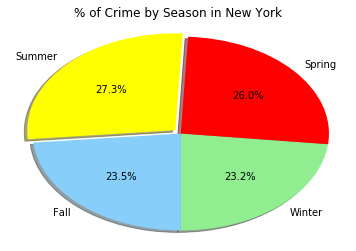

In [92]:
plt.title("% of Crime by Season in New York")
plt.pie(crime, explode=explode, labels=seasons, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=270)
plt.axis("auto")
plt.show()

In [93]:
weather = pd.read_csv("Weather_Data/Weather.csv")
weather.head()

,City,Month,High_avg,Low_avg
0,Chicago,January,32,21
1,Chicago,February,36,26
2,Chicago,March,45,34
3,Chicago,April,56,43
4,Chicago,May,66,53


In [94]:
newyork_weather = weather.loc[weather["City"] == "New York", :]
newyork_weather.head()

,City,Month,High_avg,Low_avg
36,New York,January,39,27
37,New York,February,42,28
38,New York,March,50,35
39,New York,April,62,45
40,New York,May,72,54


In [95]:
newyork_jan = len(newyork_2018.loc[((newyork_2018["Date"] >= "2018-01-01") &
                               (newyork_2018["Date"] <= "2018-01-31"))])
                    
newyork_feb = len(newyork_2018.loc[((newyork_2018["Date"] >= "2018-02-01") &
                               (newyork_2018["Date"] <= "2018-02-28"))])

newyork_mar = len(newyork_2018.loc[((newyork_2018["Date"] >= "2018-03-01") &
                               (newyork_2018["Date"] <= "2018-03-31"))])

newyork_apr = len(newyork_2018.loc[((newyork_2018["Date"] >= "2018-04-01") &
                               (newyork_2018["Date"] <= "2018-04-30"))])
                    
newyork_may = len(newyork_2018.loc[((newyork_2018["Date"] >= "2018-05-01") &
                               (newyork_2018["Date"] <= "2018-05-31"))])

newyork_jun = len(newyork_2018.loc[((newyork_2018["Date"] >= "2018-06-01") &
                               (newyork_2018["Date"] <= "2018-06-30"))])

newyork_jul = len(newyork_2018.loc[((newyork_2018["Date"] >= "2018-07-01") &
                               (newyork_2018["Date"] <= "2018-07-31"))])
                    
newyork_aug = len(newyork_2018.loc[((newyork_2018["Date"] >= "2018-08-01") &
                               (newyork_2018["Date"] <= "2018-08-31"))])

newyork_sept = len(newyork_2018.loc[((newyork_2018["Date"] >= "2018-09-01") &
                               (newyork_2018["Date"] <= "2018-09-30"))])

newyork_oct = len(newyork_2018.loc[((newyork_2018["Date"] >= "2018-10-01") &
                               (newyork_2018["Date"] <= "2018-10-31"))])
                    
newyork_nov = len(newyork_2018.loc[((newyork_2018["Date"] >= "2018-11-01") &
                               (newyork_2018["Date"] <= "2018-11-30"))])

newyork_dec = len(newyork_2018.loc[((newyork_2018["Date"] >= "2018-12-01") &
                               (newyork_2018["Date"] <= "2018-12-31"))])

In [96]:
#Build bar and line chat
#show crime by season and high and low temp by season
#x-axis is for seasons
Crimes = [newyork_jan, newyork_feb, newyork_mar, 
          newyork_apr, newyork_may, newyork_jun, 
          newyork_jul, newyork_aug, newyork_sept, 
          newyork_oct, newyork_nov, newyork_dec]

x_axis = ["Jan", "Feb", "Mar", 
          "Apr", "May", "Jun", 
          "Jul", "Aug", "Sept", 
          "Oct", "Nov", "Dec"]

In [97]:
m1_t = pd.DataFrame({
 'Number of Crimes' : [newyork_jan, newyork_feb, newyork_mar, 
          newyork_apr, newyork_may, newyork_jun, 
          newyork_jul, newyork_aug, newyork_sept, 
          newyork_oct, newyork_nov, newyork_dec],
 'Highs' : newyork_weather["High_avg"],
 'Lows' : newyork_weather["Low_avg"]})

m1_t.head()

,Number of Crimes,Highs,Lows
36,37161,39,27
37,34327,42,28
38,37127,50,35
39,37206,62,45
40,40856,72,54


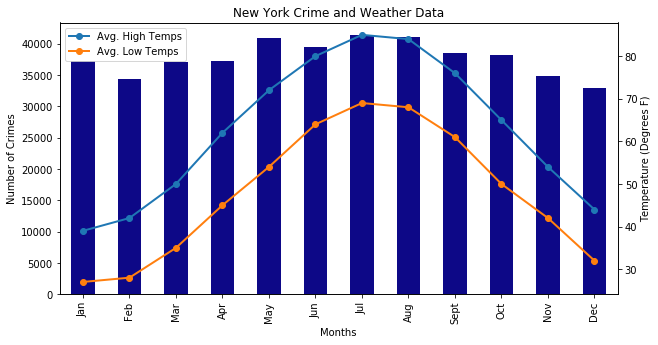

In [98]:
fig = plt.figure(figsize= (10, 5))
ax = m1_t['Number of Crimes'].plot(kind='bar', use_index=True, colormap="plasma")

plt.ylabel("Number of Crimes")
plt.xlabel("Months")
plt.title("New York Crime and Weather Data")

ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),
         m1_t[['Highs','Lows']].values,
         linestyle='-',
         marker='o', linewidth=2.0)
ax.set_xticklabels(tuple(x_axis))
plt.legend(("Avg. High Temps", "Avg. Low Temps"), loc="upper left")
plt.ylabel("Temperature (Degrees F)")
plt.show()

In [99]:
# Observed data in a (hypothetical) survey of 300 people 
observed = pd.Series([105636,118026,123935,106857], index=["Winter", "Spring", "Summer", "Fall"])

In [100]:
# Create a data frame
df = pd.DataFrame([observed]).T

In [101]:
# Add a column whose default values are the expected values
df[1] = 113613.5

In [102]:
# Rename columns
df.columns = ["Observed", "Expected"]

In [103]:
# View the data frame
df

,Observed,Expected
Winter,105636,113613.5
Spring,118026,113613.5
Summer,123935,113613.5
Fall,106857,113613.5


In [104]:
# The degree of freedom is 4-1 = 3
# With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95.
critical_value = stats.chi2.ppf(q = 0.95, df = 3)

In [105]:
# The critical value
critical_value

7.814727903251179

In [106]:
# Run the chi square test with stats.chisquare()
stats.chisquare(df['Observed'], df['Expected'])

Power_divergenceResult(statistic=2071.00667614324, pvalue=0.0)

In [107]:
newyork_2018["Month"] = newyork_2018["Date"].dt.month

In [108]:
newyork_2018.isna().sum()

Date          0
Latitude     39
Longitude    39
City          0
Month         0
dtype: int64

In [109]:
newyork_clean = newyork_2018.dropna(how='any')
newyork_clean.head()

,Date,Latitude,Longitude,City,Month
451689,2018-01-01,40.801521,-73.914918,New York,1
451690,2018-01-01,40.711245,-73.957770,New York,1
451691,2018-01-01,40.594150,-73.958604,New York,1
451696,2018-01-01,40.670655,-73.913391,New York,1
451688,2018-01-01,40.732152,-73.744029,New York,1


In [110]:
# Store latitude and longitude in locations
locations = newyork_clean[["Latitude", "Longitude"]]

# Fill NaN values and convert to float
rating = newyork_clean["Month"].astype(float)

In [111]:
# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, dissipating=True, max_intensity=10, point_radius=10)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))